In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Загружаем файл:

In [128]:
df = pd.read_csv("weatherAUS.csv")

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Описание данных:
Date - Дата наблюдений
Location - Название локации, в которой расположена метеорологическая станция
MinTemp - Минимальная температура в градусах цельсия
MaxTemp - Максимальная температура в градусах цельсия
Rainfall - Количество осадков, зафиксированных за день в мм
Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
Sunshine - Число солнечных часов за день
WindGustDir - направление самого сильного порыва ветра за последние 24 часа
WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
WindDir9am - направление ветра в 9 утра
WindDir3pm - направление ветра в 3 часа дня
WindSpeed9am - скорость ветра в 9 утра
WindSpeed3pm - скорость ветра в 3 часа дня
Humidity9am - влажность в 9 утра
Humidity3pm - Влажность в 3 дня
Pressure9/3 - давление
Cloud - облачность
Temp - температура
RainToday - дождь сегодня
RISK_MM - ?
RainTomorrow - целевая переменная

In [130]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Отсюда мы можем увидеть, что следующие данные нужно преобразовать в численный формат: Date - переведём в день, так как нам важна
только сезонность; Location - заменим численным представлением, сопоставив каждому названия своё число; Evaporation и Sunshine -
много NaN, нужно взять медианное значение (скорее всего). WindGustDir и WindDir9am - направление ветра, тоже заменим по аналогии 
с регионом. Cloud - много NaN, нужно заменить (на что?). RainToday - бинаризовать.

Date:

In [131]:
df["Date"] = pd.to_datetime(df["Date"]).dt.dayofyear

Location

In [132]:
locations_unique = pd.unique(df["Location"])

In [133]:
names_of_distr = {locations_unique[i]: i for i in range(len(locations_unique))} 

In [134]:
df["Location"] = df["Location"].map(names_of_distr)

WindGustDir and WindDir9am

In [135]:
directions_unique = df["WindGustDir"].dropna().unique()

In [136]:
directions_unique

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [137]:
df["WindGustDir"] = df["WindGustDir"].map({directions_unique[i]: i for i in range(len(directions_unique))})
df["WindDir9am"] = df["WindDir9am"].map({directions_unique[i]: i for i in range(len(directions_unique))})
df["WindDir3pm"] = df["WindDir3pm"].map({directions_unique[i]: i for i in range(len(directions_unique))})

In [138]:
df["RainToday"] = df["RainToday"].map({"No" : False, "Yes" : True})
df["RainTomorrow"] = df["RainTomorrow"].map({"No" : False, "Yes" : True})

In [139]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,336,0,13.4,22.9,0.6,NaN,NaN,0.0,44.0,0.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,False,0.0,False
1,337,0,7.4,25.1,0.0,NaN,NaN,1.0,44.0,4.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,False,0.0,False
2,338,0,12.9,25.7,0.0,NaN,NaN,2.0,46.0,0.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,False,0.0,False
3,339,0,9.2,28.0,0.0,NaN,NaN,3.0,24.0,12.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,False,1.0,False
4,340,0,17.5,32.3,1.0,NaN,NaN,0.0,41.0,8.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,0.2,False


In [140]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [141]:
X = df.iloc[:, 0:df.shape[1]-1]
Y = df["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [142]:
X_train = X_train.fillna(np.median(X_train))
X_test = X_test.fillna(np.median(X_test))

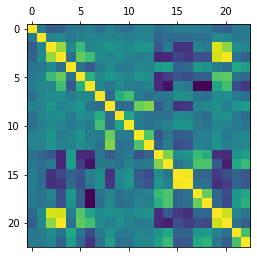

In [143]:
plt.matshow(df.corr())
plt.show()

<AxesSubplot:>

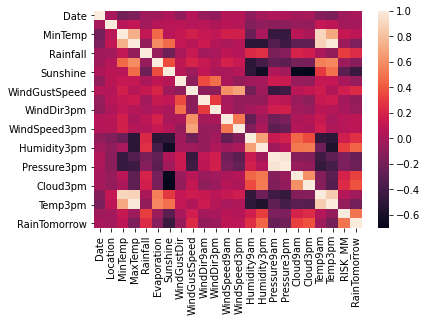

In [144]:
sns.heatmap(df.corr())

# 1.Байесовские классификаторы

BernoulliNB не подойдёт, так как есть небинарные данные.
Для начала попробуем GaussianNB:

In [145]:
from sklearn.naive_bayes import *

In [146]:
%%time
classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

Wall time: 405 ms


In [147]:
np.mean(prediction == y_test)

0.9739322049791364

Как мы видим, результат очень высокий, возможно, какие-то признаки сильно скореллированы, поэтому чуть позже постараемся их найти. MultinomialNB не позволяет работать с данными с отрицательными значениями (почему?), поэтому оставляем результата GaussianNB.

Погуглив, можно найти это задание на Kaggle и прочитать, что они просят исключить из датасета столбец RAIN_MM, потому что 
на его основе и создавалась целевая переменная и он "даст утечку" данных (это видно из таблицы корреляций). Попробуем это сделать:

In [148]:
df.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
Date,1.000000,0.003788,-0.201592,-0.162034,-0.030537,-0.026410,0.024974,-0.085002,0.060800,-0.062968,...,-0.090145,-0.018086,0.032787,0.023361,-0.009580,-0.004025,-0.134122,-0.173275,-0.031640,0.007626
Location,0.003788,1.000000,0.071677,0.105195,-0.017604,0.060999,0.076659,0.078365,0.048776,0.072718,...,-0.143637,-0.086859,-0.103491,-0.108360,-0.063706,-0.065882,0.115088,0.093380,-0.017564,-0.009608
MinTemp,-0.201592,0.071677,1.000000,0.736267,0.104255,0.467261,0.072961,0.125033,0.177285,0.121985,...,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743,0.083936
MaxTemp,-0.162034,0.105195,0.736267,1.000000,-0.074839,0.588915,0.469967,0.115910,0.067690,0.142334,...,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208,-0.159237
Rainfall,-0.030537,-0.017604,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.008104,0.133497,-0.010493,...,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557,0.239032
Evaporation,-0.026410,0.060999,0.467261,0.588915,-0.064549,1.000000,0.366607,0.095311,0.203001,0.130707,...,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498,-0.119285
Sunshine,0.024974,0.076659,0.072961,0.469967,-0.227525,0.366607,1.000000,0.068251,-0.032831,0.105072,...,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973,-0.450768
WindGustDir,-0.085002,0.078365,0.125033,0.115910,0.008104,0.095311,0.068251,1.000000,-0.094178,0.360319,...,-0.037731,-0.017460,0.142647,0.137361,-0.045577,-0.076478,0.120984,0.118793,0.003477,-0.059799
WindGustSpeed,0.060800,0.048776,0.177285,0.067690,0.133497,0.203001,-0.032831,-0.094178,1.000000,-0.106004,...,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923,0.234010
WindDir9am,-0.062968,0.072718,0.121985,0.142334,-0.010493,0.130707,0.105072,0.360319,-0.106004,1.000000,...,-0.067739,-0.066707,0.103914,0.081280,-0.051769,-0.095723,0.132260,0.152863,-0.009585,-0.081186


Отсюда видно, что их корреляция самая большая - 0.5. Есть и другие скорелированные признаки, но их корреляцию можно объяснить логичски (например, связь влажности и облачности в 3 часа предыдущего дня с дождём завтра - прямая, а вот с sunshine - обратная, на что указывает минус).

In [149]:
X = X.drop("RISK_MM", axis=1)

Также уберём температуру в 9 и 3 часа из=за её корреляции с максимальной и минимальной:

In [151]:
X = X.drop(["Temp9am", "Temp3pm"], axis=1)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)
X_train = X_train.fillna(np.median(X_train))
X_test = X_test.fillna(np.median(X_test))

In [153]:
X_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
99535,92,33,10.6,25.0,0.0,3.8,13.0,4.0,61.0,5.0,4.0,22.0,33.0,55.0,39.0,1011.9,1008.8,7.0,4.0,False
99536,93,33,12.2,19.9,0.6,13.0,13.0,15.0,43.0,2.0,7.0,11.0,26.0,83.0,32.0,1019.0,1021.5,6.0,5.0,False
99537,94,33,5.9,20.2,0.0,13.0,13.0,10.0,31.0,7.0,10.0,7.0,19.0,55.0,45.0,1028.4,1025.5,6.0,3.0,False
99538,95,33,3.4,23.3,0.0,12.6,9.3,5.0,31.0,14.0,4.0,7.0,15.0,69.0,32.0,1022.9,1016.6,0.0,2.0,False
99539,96,33,10.1,23.5,0.0,4.0,3.2,11.0,52.0,4.0,7.0,22.0,19.0,36.0,87.0,1009.6,1011.2,7.0,8.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,171,48,3.5,21.8,0.0,13.0,13.0,14.0,31.0,13.0,14.0,15.0,13.0,59.0,27.0,1024.7,1021.2,13.0,13.0,False
142189,172,48,2.8,23.4,0.0,13.0,13.0,14.0,31.0,12.0,8.0,13.0,11.0,51.0,24.0,1024.6,1020.3,13.0,13.0,False
142190,173,48,3.6,25.3,0.0,13.0,13.0,4.0,22.0,12.0,5.0,13.0,9.0,56.0,21.0,1023.5,1019.1,13.0,13.0,False
142191,174,48,5.4,26.9,0.0,13.0,13.0,5.0,37.0,12.0,1.0,9.0,9.0,53.0,24.0,1021.0,1016.8,13.0,13.0,False


In [157]:
%%time
classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

Wall time: 356 ms


In [158]:
np.mean(prediction == y_test)

0.8354353227999437

Сейчас значение выглядит более реально. Здесь стоит зафиксировать факт малого времени исполнения вне зависимости от большого количества данных: 508 мс.

In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, roc_auc_score

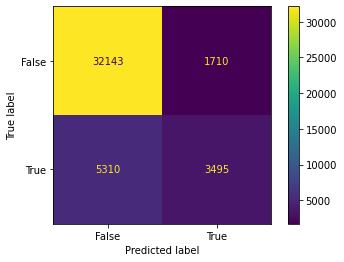

In [160]:
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [161]:
accuracy_score(y_test, prediction)

0.8354353227999437

In [162]:
precision_score(y_test, prediction)

0.6714697406340058

In [163]:
recall_score(y_test, prediction)

0.3969335604770017

In [164]:
f1_score(y_test, prediction)

0.4989293361884368

In [165]:
roc_auc_score(y_test, prediction)

0.6732105252537137

# 2.Метод ближайших соседей

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
%%time
neighbors = KNeighborsClassifier(n_neighbors=7)
neighbors.fit(X_train, y_train)
prediction = neighbors.predict(X_test)

Wall time: 49.7 s


In [190]:
print(round(accuracy_score(y_test, prediction), 3))
print(round(precision_score(y_test, prediction), 3))
print(round(recall_score(y_test, prediction), 3))
print(round(f1_score(y_test, prediction), 3))
print(round(roc_auc_score(y_test, prediction), 3))

0.843
0.696
0.428
0.53
0.69


Видим, что значение при 1 соседе меньше, причём время выполнения просто ОГРОМНОЕ (37.1 секунда). Цикл ниже нет особого смысла составлять, потому что даже расчёт только 1 значения занимает приличное время, здесь же цикл работает очень долго

In [171]:
%%time
n_nb = range(1, 8, 2)
result = []
f1_sc = []
roc_auc = []
for i in n_nb:
    neighbors = KNeighborsClassifier(n_neighbors=i)
    neighbors.fit(X_train, y_train)
    prediction = neighbors.predict(X_test)
    
    result.append(np.mean(prediction == y_test))
    f1_sc.append(f1_score(y_test, prediction))
    roc_auc.append(roc_auc_score(y_test, prediction))

Wall time: 2min 52s


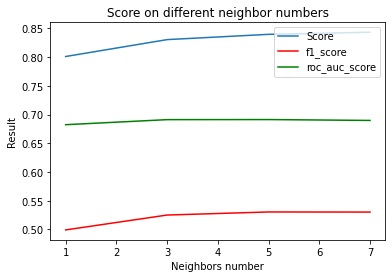

In [179]:
plt.figure()
plt.plot(n_nb, result, label="Score")
plt.plot(n_nb, f1_sc, color="red", label = "f1_score")
plt.plot(n_nb, roc_auc, color="green", label="roc_auc_score")
plt.xlabel("Neighbors number")
plt.ylabel("Result")
plt.title("Score on different neighbor numbers")
plt.legend()

Отсюда можно увидеть, что общий результат растёт с увеличением количества соседей (берём только нечетные, так как задача с 2 классами), но не сильно.
Score = 0.843, f1_score = 0.53, roc_auc=0.6898

# 3. Логистическая регрессия

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
%%time
classifier = LogisticRegression(penalty = 'l2', max_iter=5000)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

Wall time: 22.6 s


In [183]:
classifier.score(X_test, y_test)

0.845234188194477

Пока что логистическая регрессия выдала нам самое большое значение по точности, но время выполнения очень большое - , к тому же она пару раз останавливалась при достижении максимального количества итераций.

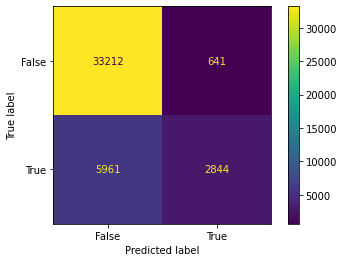

In [184]:
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

Отсюда видно, что неверно предсказанные результаты носят для нас плохой характер: намного больше неверных там, где мы не смогли предсказать дождь, а он был (что для человека хуже, чем если бы мы предсказали дождь, а его бы не было).

In [185]:
precision_score(y_test, prediction)

0.8160688665710186

In [186]:
recall_score(y_test, prediction)

0.32299829642248723

In [187]:
f1_score(y_test, prediction)

0.46281529698942225

In [188]:
roc_auc_score(y_test, prediction)

0.6520317450268877

Таким образом логистическая регрессия дала лучший показатель по precision_score = 0.816, но худшие - по всем остальными метрикам

In [191]:
d = {"Bayes":[0.835, 0.671, 0.396, 0.498, 0.673], 
     "Neighbors":[0.843, 0.696, 0.428, 0.53, 0.69],
    "Logistic":[0.845, 0.816, 0.322, 0.462, 0.652]}
challenge = pd.DataFrame(d)
challenge

,Bayes,Neighbors,Logistic
0,0.835,0.843,0.845
1,0.671,0.696,0.816
2,0.396,0.428,0.322
3,0.498,0.530,0.462
4,0.673,0.690,0.652


0 - accuracy_score,
1 - precision,
2 - recall,
3 - f1,
4 - roc_auc

Отсюда видно, что в целом лучший результат получился через Neighbors. Хотя бы потому, что модель выдаёт наибольший recall - его здесь можно назвать главной метрикой (потому что нам важно, сколько было случаев false negative - когда мы не смогли угадать, что завтра будет дождь). В любом случае, recall во всех моделях очень низок.